# `20180317a` Testing the new versions at 32 and 64Msps with Probe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve

import re
import glob, os

## Creating the set of acquisitions

db-bard-5-8-cable_inversed-VGA@0x22-spimode1-64msps.csv
second


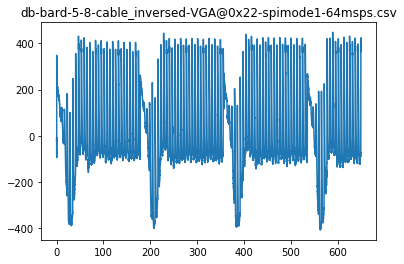

db-bard-5-0-VGA@0x22-spimode1-64msps.csv
second


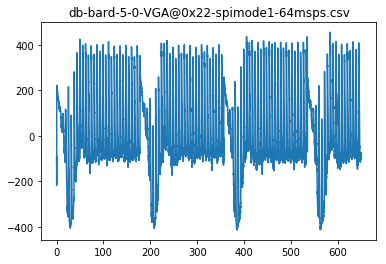

In [5]:
AA = []
lbl = []
IDLine = []

for CSVFile in glob.glob("db-b*.csv"):
    print CSVFile
    A = np.genfromtxt(CSVFile, delimiter=';').astype(int)[1:]
    tmp = [] 
    N = len(A)
    FF = CSVFile.split(".")[0].split("-")[-1]
    lbl.append(  CSVFile.split("-")[2] )
    f = int(re.sub('[^0-9]','', FF))
    #F = int(CSVFile.split(".")[0])

    if (A[4]) < 0b111:
        print "first"
        for i in range(len(A)/2-1):
            value = 128*(A[2*i+1]&0b111) + A[2*i+2] - 512
            IDLine.append((A[2*i+1]&0b11110000)/16) # Identify the # of the line
            tmp.append( value ) 
    else:
        print "second"
        for i in range(len(A)/2-1):
            value = 128*(A[2*i+1]&0b111) + A[2*i+2] - 512
            IDLine.append((A[2*i+1]&0b11110000)/16)
            #print A[2*i]&0b10000000,A[2*i+1]&0b10000000,
            tmp.append( value )
            #print A[2*i+1]
            #print A[i+1]-A[i] 
            
    #t = t*1.0/f
    t = [ 1.0*x/f for x in range(len(tmp))]
    plt.plot(t,tmp)
    plt.title(CSVFile)
    plt.savefig(CSVFile.split(".")[0].split("/")[-1]+".jpg")
    plt.show()
    
    AA.append(tmp)
    




In [26]:
n = len(AA)
print n
len(AA[n-1])

5


20798

8319 41598


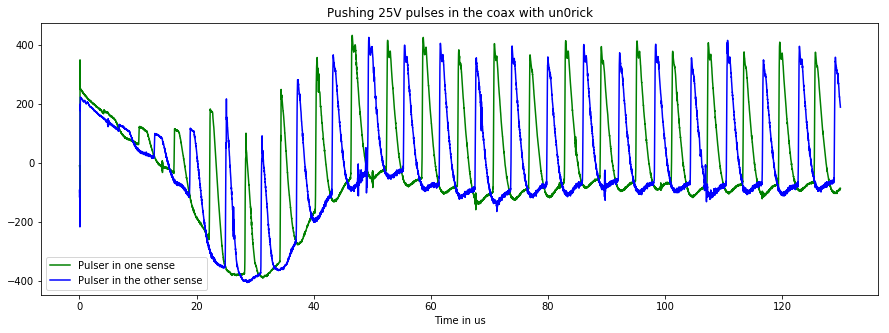

In [16]:
k = 1
L = len(AA[0]) 

f = 64.0
Signal = AA[0][0:L/5]
Signal2 = AA[1][0:L/5]

t = [ 1.0*x/f for x in range(L)]
print len(Signal),len(t)

plt.figure(figsize=(15,5))
plt.title("Pushing 25V pulses in the coax with un0rick")
plt.plot(t[0:L/5],Signal,"g",label="Pulser in one sense")
#plt.plot(t[0:L/5],AA[4][0:L/5],"r")
plt.plot(t[0:L/5],Signal2,"b",label="Pulser in the other sense")
plt.xlabel("Time in us")
plt.legend()
plt.savefig("bard.jpg")
plt.show()

In [8]:
for i in range(2):
    print glob.glob("db-b*.csv")[i]

db-bard-5-8-cable_inversed-VGA@0x22-spimode1-64msps.csv
db-bard-5-0-VGA@0x22-spimode1-64msps.csv
